In [2]:
import data_structure as ds
from data_structure import Gender
import numpy as np

men_curr = ds.locate('Peter',
          column='current_salary',
          gender=Gender.Male,
          dataframe=ds.search_all())

female_curr = ds.locate('Peter',
            column='current_salary',
            gender=Gender.Female,
            dataframe=ds.search_all())

np.mean(men_curr), np.mean(female_curr)

INFO:root:Running safety check on commit
INFO:root:Successfully ran safety check on commit
INFO:root:Running safety check on merge_databases
INFO:root:Successfully ran safety check on merge_databases
INFO:root:Running safety check on commit_multiple
INFO:root:Successfully ran safety check on commit_multiple
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for males in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for females in all's database


(87.69047619047619, 85.3157894736842)

In [3]:
men_deserved = ds.locate('Peter',
          column='deserved_salary',
          gender=Gender.Male,
          dataframe=ds.search_all())

female_deserved = ds.locate('Peter',
            column='deserved_salary',
            gender=Gender.Female,
            dataframe=ds.search_all())

np.mean(men_deserved), np.mean(female_deserved)
                         

INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for males in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for females in all's database


(105.95238095238095, 102.52631578947368)

In [4]:
df = ds.search_all()
df.groupby('name')[['deserved_salary', 'current_salary']].mean().sort_values('deserved_salary', ascending=False)

,deserved_salary,current_salary
name,,
John,110.500000,92.000000
Richard,109.000000,88.000000
William,108.000000,89.500000
Michael,106.500000,88.000000
Christopher,106.333333,88.833333
Jessica,106.000000,87.000000
Thomas,105.500000,87.000000
Robert,104.500000,86.000000
David,104.000000,86.000000


<AxesSubplot: xlabel='deserved_salary', ylabel='Count'>

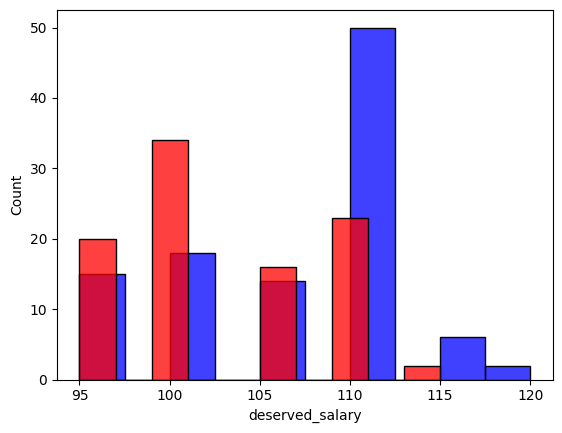

In [5]:
import seaborn as sns

# sns.histplot(data=df.groupby('gender')['deserved_salary'])

m_mask = df['gender'] == Gender.Male
f_mask = df['gender'] == Gender.Female

df_men, df_fem = df[m_mask], df[f_mask]

sns.histplot(data=df[m_mask]['deserved_salary'], color='blue', bins=10)
sns.histplot(data=df[f_mask]['deserved_salary'], color='red', bins=10)

<AxesSubplot: xlabel='current_salary', ylabel='Count'>

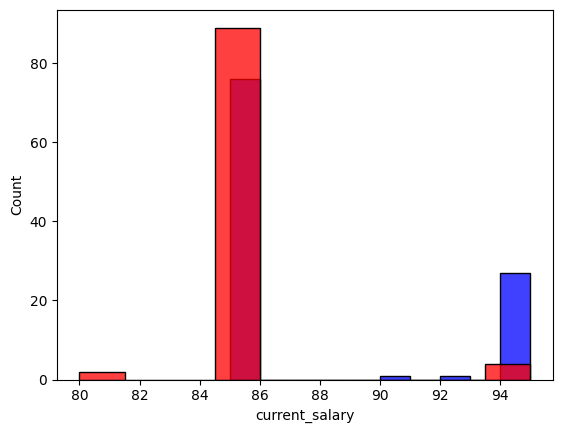

In [6]:
sns.histplot(data=df[m_mask]['current_salary'], color='blue', bins=10)
sns.histplot(data=df[f_mask]['current_salary'], color='red', bins=10)

In [7]:
from scipy.stats import ttest_ind

ttest_ind(df[m_mask]['deserved_salary'], df[f_mask]['deserved_salary'])
ttest_ind(df[m_mask]['current_salary'], df[f_mask]['current_salary'])

TtestResult(statistic=4.756213358809789, pvalue=3.793483062014191e-06, df=198.0)

In [8]:
spooled = np.sqrt(
    (
        ((len(df_men)-1)*df_men['deserved_salary'].std()**2) + 
    ((len(df_fem)-1)*df_fem['deserved_salary'].std()**2)
    ) / (len(df_men) + len(df_fem) - 2)
    )



cohen_d = (df[m_mask]['deserved_salary'].mean() - df[f_mask]['deserved_salary'].mean()) / spooled
cohen_d

0.5682099507168042

In [9]:
import statsmodels.stats.power as smp

effect_size = cohen_d
alpha = 0.01
power = 0.99

nobs1 = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
nobs1


150.53482238146546

<AxesSubplot: xlabel='deserved_salary', ylabel='Count'>

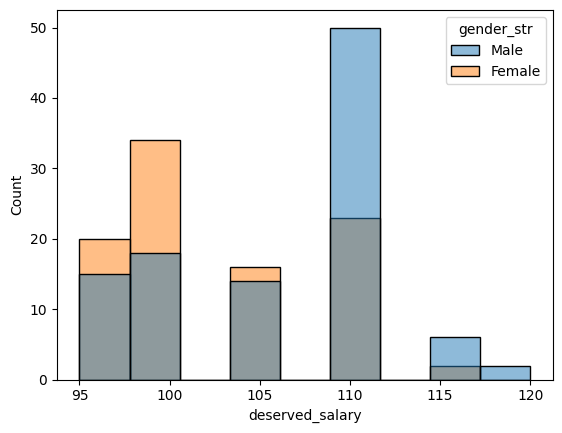

In [11]:
df['gender_str'] = df['gender'].apply(lambda x: x.name)

# Now use 'gender_str' for the 'hue' parameter
sns.histplot(df, x='deserved_salary', hue='gender_str')